# Reconnaissance de Visages

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/use-cases/face-detection.ipynb)

La librarie [deepface](https://github.com/serengil/deepface) encapsule de multiples modèles, dont VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace, Dlib, SFace and GhostFaceNet, pour traiter des problèmes de reconnaissance de visages. Dans cet example, nous utilisons [retinaface](https://github.com/serengil/retinaface) pour sa simplicité et sa rapidité.

In [26]:
import sys

# Supprimer les commentaires pour installer
# !pip3 install -q -U numpy
# !pip3 install -q -U Pillow

# À installer dans tous les cas pour Google Colab
if 'google.colab' in sys.modules:
    !pip3 install -q -U retina-face

In [27]:
# Cette variable python est accessible depuis les commandes shell
work_directory = './face-detection'

# Récupération des données (notamment pour Google Colab)
!curl --create-dirs -O --output-dir $work_directory 'https://raw.githubusercontent.com/digillia/Digillia-Colab/main/data/solvay_1927.jpeg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  245k  100  245k    0     0   926k      0 --:--:-- --:--:-- --:--:--  924k     0 --:--:-- --:--:-- --:--:--     0


In [28]:
import numpy as np
from PIL import Image, ImageDraw
from retinaface import RetinaFace

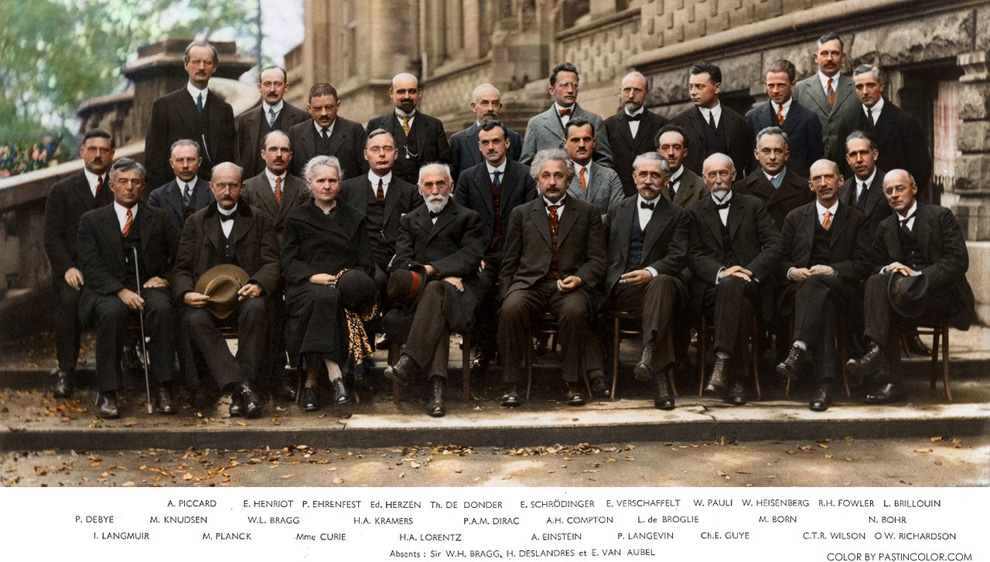

In [29]:
solvay_path = f'{work_directory}/solvay_1927.jpeg'
img = Image.open(solvay_path)
display(img)

In [30]:
faces = RetinaFace.detect_faces(solvay_path)
print(len(faces))

29


In [31]:
def highlight(face, ctx):
   # print(face)
   facial_area = face['facial_area']
   landmarks = face['landmarks']
 
   # facial area
   ctx.rectangle(facial_area, outline='green', width=1)
 
   # landmarks
   R = [1,1]
   ctx.ellipse([tuple(np.subtract(landmarks['left_eye'], R)), tuple(np.add(landmarks['left_eye'], R))], fill='red')
   ctx.ellipse([tuple(np.subtract(landmarks['right_eye'], R)), tuple(np.add(landmarks['right_eye'], R))], fill='red')
   ctx.ellipse([tuple(np.subtract(landmarks['nose'], R)), tuple(np.add(landmarks['nose'], R))], fill='blue')
   ctx.line([tuple(landmarks['mouth_right']), tuple(landmarks['mouth_left'])], fill='yellow')

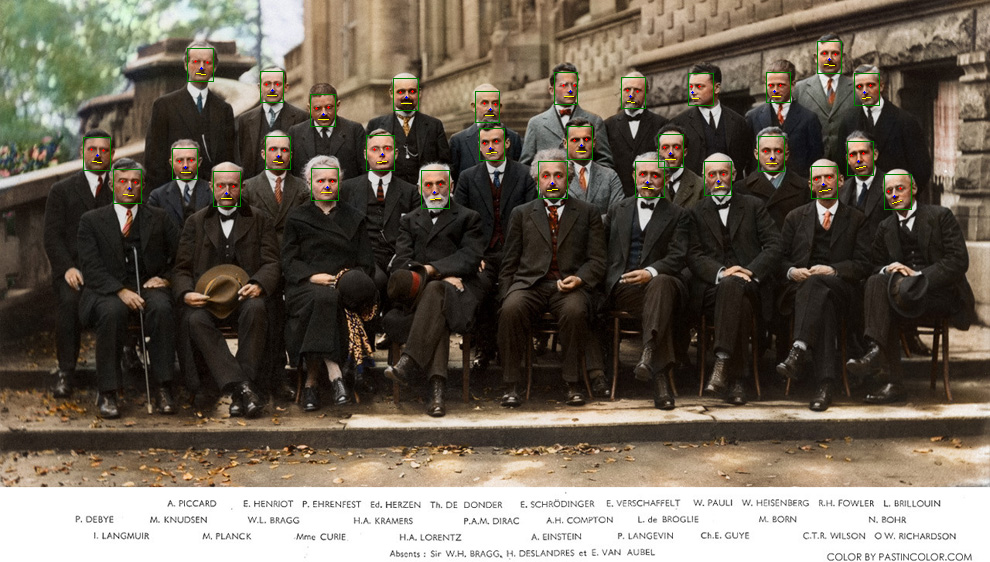

In [32]:
# Copie d'Image
out = img.copy()
# Créer le contexte
ctx = ImageDraw.Draw(out)
# Entourer les visages
for face in faces:
    highlight(faces[face], ctx)
# Afficher
display(out)

In [33]:
# Ménage
!rm -rf $work_directory